**Pytorch Activation Function Implementations**

Implemented
<ul>
<li id="Contents-Sigmoid"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html">Sigmoid</a></li>
<li id="Contents-Hardsigmoid"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardsigmoid.html">Hardsigmoid</a></li>
<li id="Contents-Tanh"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html">Tanh</a></li>
<li id="Contents-Hardtanh"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardtanh.html">Hardtanh</a></li>
<li id="Contents-Softsign"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Softsign.html">Softsign</a></li>
<li id="Contents-ReLU"><a href="https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html">ReLU</a></li>
<li id="Contents-ReLU6"><a href="https://pytorch.org/docs/stable/generated/torch.nn.ReLU6.html">ReLU6</a></li>
<li id="Contents-LeakyReLU"><a href="https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html">LeakyReLU</a></li>
<li id="Contents-PReLU"><a href="https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html">PReLU</a></li>
<li id="Contents-Threshold"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Threshold.html">Threshold</a></li>
<li id="Contents-ELU"><a href="https://pytorch.org/docs/stable/generated/torch.nn.ELU.html">ELU</a></li>
<li id="Contents-CELU"><a href="https://pytorch.org/docs/stable/generated/torch.nn.CELU.html">CELU</a></li>
<li id="Contents-Softplus"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Softplus.html">Softplus</a></li>
<li id="Contents-LogSigmoid"><a href="https://pytorch.org/docs/stable/generated/torch.nn.LogSigmoid.html">LogSigmoid</a></li>
<li id="Contents-Swish"><a href="https://pytorch.org/docs/stable/generated/torch.nn.SiLU.html">Swish</a></li>
<li id="Contents-Hardswish"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardswish.html">Hardswish</a></li>
<li id="Contents-Mish"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Mish.html">Mish</a></li>
<li id="Contents-GELU"><a href="https://pytorch.org/docs/stable/generated/torch.nn.GELU.html">GELU</a></li>
<li id="Contents-HardShrink"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardshrink.html">Hardshrink</a></li>
<li id="Contents-SoftShrink"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Softshrink.html">Softshrink</a></li>
<li id="Contents-TanhShrink"><a href="https://pytorch.org/docs/stable/generated/torch.nn.Tanhshrink.html">Tanhshrink</a></li>
</ul>

Not Implemented
- <a href="https://pytorch.org/docs/stable/generated/torch.nn.RReLU.html">RReLU</a> / <a href="https://pytorch.org/docs/stable/generated/torch.nn.SELU.html">SELU</a> / <a href="https://pytorch.org/docs/stable/generated/torch.nn.GLU.html">GLU</a>
- <a href="https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html">Softmax</a> / <a href="https://pytorch.org/docs/stable/generated/torch.nn.Softmin.html">Softmin</a> / <a href="https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html">LogSoftmax</a> / <a href="https://pytorch.org/docs/stable/generated/torch.nn.Softmax2d.html">Softmax2d</a>
- <a href="https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveLogSoftmaxWithLoss.html">AdaptiveLogSoftmaxWithLoss</a>
- <a href="https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html">MultiheadAttention</a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kdha0727/pytorch-activation-implementation/blob/master/pytorch-activation-implementation.ipynb)


In [ ]:
# Formatting Tools

%matplotlib inline

import functools
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn


def plot_activation_function(function, wider=False, title_kwargs=None):
    decorator_return = function
    if isinstance(function, type):
        name = function.__name__
        if issubclass(function, torch.autograd.Function):  # autograd Function
            function = function.apply
        elif issubclass(function, nn.Module):  # uninitialized class of Module
            function = function()
        else:
            assert False
    else:
        name = type(function).__name__
        if isinstance(function, torch.autograd.Function):  # autograd Function
            function = function.apply
        elif not isinstance(function, nn.Module):  # assert function, method, or built-in function
            assert callable(function)
            name = function.__name__
    tick_major = np.arange(-6., 7., 2) if wider else np.arange(-4., 5., 1)
    tick_minor = np.arange(-7., 8., 1) if wider else np.arange(-4., 5., 1)
    x = torch.arange(tick_minor.min(), tick_minor.max(), 1e-3).requires_grad_()
    y = function(x)
    dydx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    d2ydx2 = torch.autograd.grad(dydx.sum(), x)[0]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    for ax, data, color, title_format in zip(
        axes, (y, dydx, d2ydx2), "rbg", ("{} Function", "Derivative of {}", "Second Derivative of {}")
    ):
        ax.axvline(0., c='k', linewidth=1., alpha=0.7)
        ax.axhline(0., c='k', linewidth=1., alpha=0.7)
        ax.plot(x.detach().cpu().numpy(), data.detach().cpu().numpy(), c=color)
        ax.set_xticks(tick_major)
        ax.set_yticks(tick_major)
        ax.set_xticks(tick_minor, minor=True)
        ax.set_yticks(tick_minor, minor=True)
        ax.grid(which="major",alpha=0.5)
        ax.grid(which="minor",alpha=0.5)
        if title_kwargs:
            title_format += " (" + ", ".join("%s=%s" % (k, v) for k, v in title_kwargs.items()) + ")"
        ax.set_title(title_format.format(name.replace("Function", "").replace("function", "")))
    plt.show()
    return decorator_return


def plot_activation_module(draw_wider=False, **initkwargs):
    def decorator(klass):
        return plot_activation_function(klass(**initkwargs), draw_wider, initkwargs)
    if isinstance(draw_wider, type) and issubclass(draw_wider, nn.Module):
        klass = draw_wider
        draw_wider = False
        return decorator(klass)
    assert isinstance(draw_wider, bool)
    return decorator


class ActivationModule(nn.Module):  # for subclass searching
    pass


# Sigmoid

$$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + \exp(-x)}$$

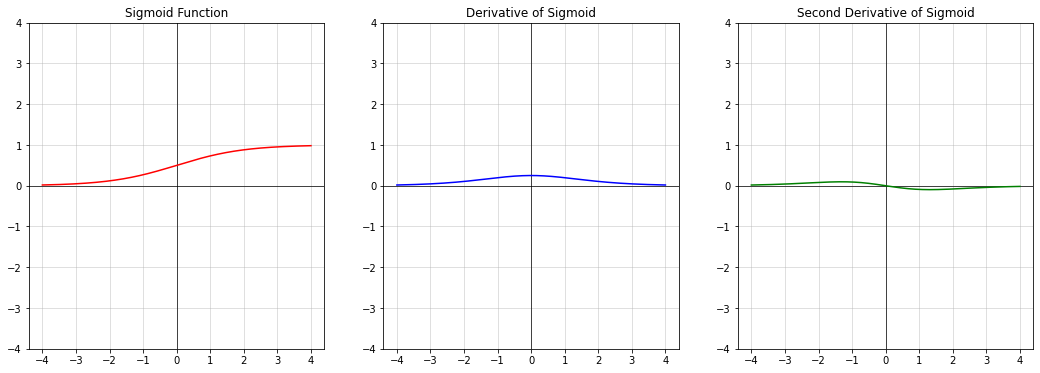

In [ ]:
@plot_activation_module()
class Sigmoid(ActivationModule):

    def forward(self, x):
        return 1. / (1. + torch.exp(-x))


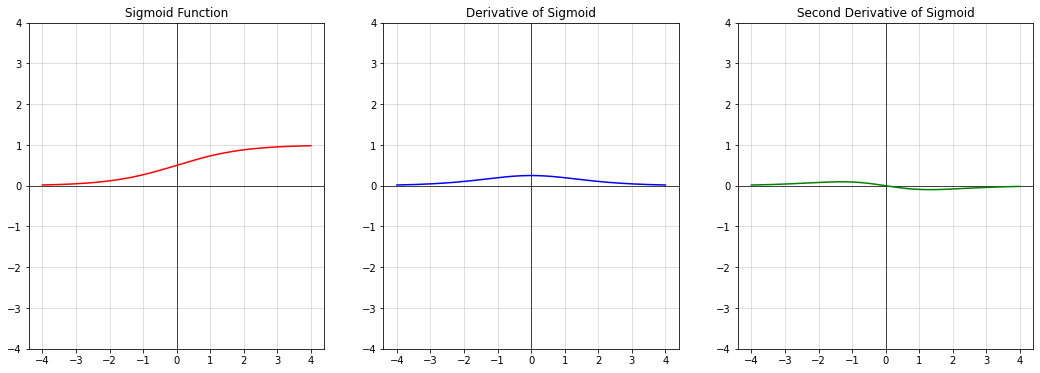

In [ ]:
@plot_activation_function
class SigmoidFunction(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input):  # noqa
        output = 1. / (1. + torch.exp(-input))
        ctx.save_for_backward(output)
        return output

    @staticmethod
    def backward(ctx, grad_output):  # noqa
        output, = ctx.saved_tensors
        return grad_output * output.sub(1.).neg().mul(output)

# Hardsigmoid

$$
\text{Hardsigmoid}(x) = \begin{cases}
    0 & \text{if~} x \le -3, \\
    1 & \text{if~} x \ge +3, \\
    x / 6 + 1 / 2 & \text{otherwise}
\end{cases}
$$

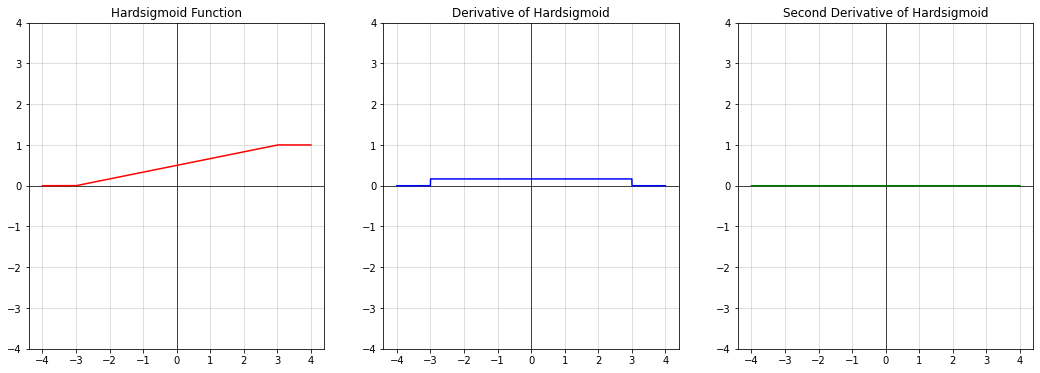

In [ ]:
@plot_activation_module()
class Hardsigmoid(ActivationModule):

    @staticmethod
    def forward(x):
        x = x.pow(1.)  # hack for second derivative
        return (x / 6. + .5).clamp(0., 1.)


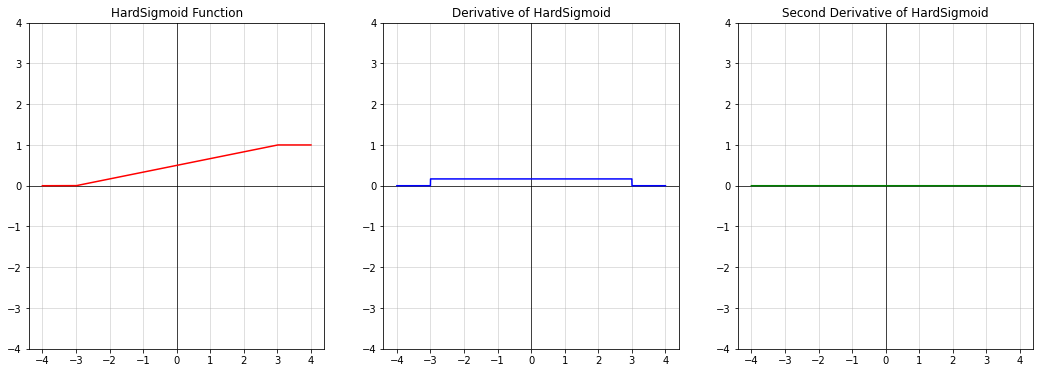

In [ ]:
@plot_activation_function
class HardSigmoidFunction(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input):  # noqa
        ctx.save_for_backward(input)
        return input.div(6.).add_(.5).clamp_(0., 1.)

    @staticmethod
    def backward(ctx, grad_output):  # noqa
        input, = ctx.saved_tensors
        dx = input.clone().fill_(1.).div(6.)
        dx[input < -3.] = 0.
        dx[input > 3.] = 0.
        return grad_output * dx

# Tanh

$$\text{Tanh}(x) = \tanh(x) = \frac{\exp(x) - \exp(-x)} {\exp(x) + \exp(-x)}$$

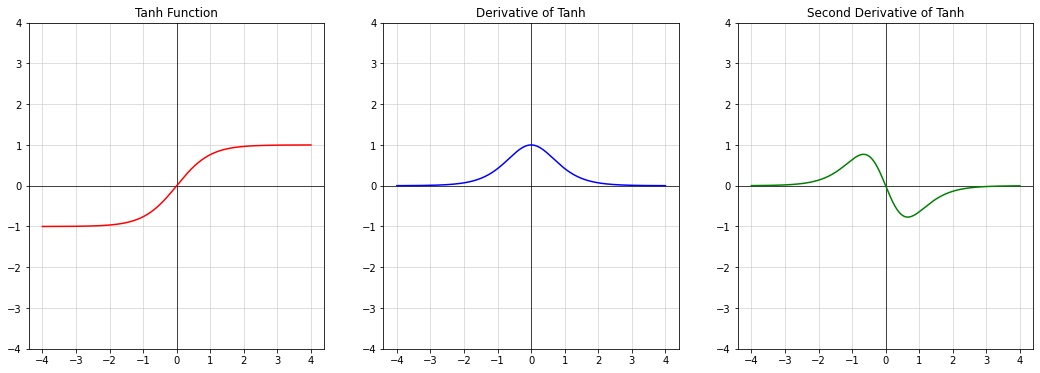

In [38]:
@plot_activation_module()  # basic activation for RNN / LSTM
class Tanh(ActivationModule):

    def forward(self, x):
        # return torch.sigmoid(2. * x) * 2. - 1.
        pos = x.exp()
        neg = (-x).exp()
        return (pos - neg) / (pos + neg)


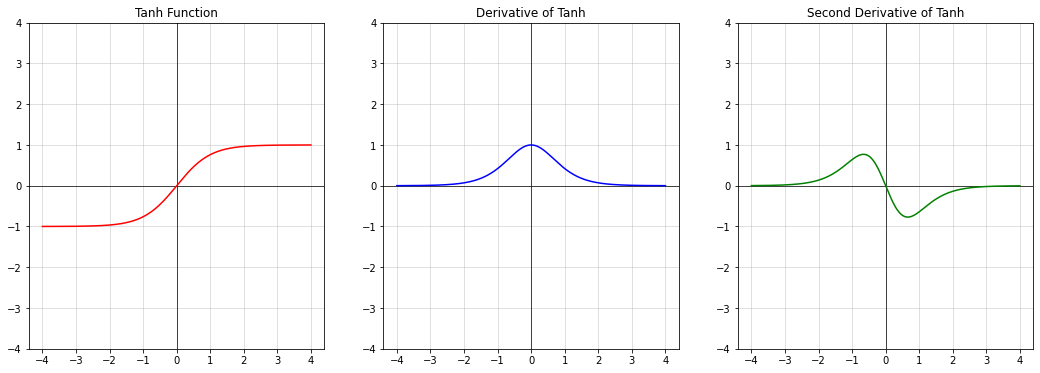

In [ ]:
@plot_activation_function
class TanhFunction(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input):  # noqa
        pos = input.exp()
        neg = input.neg().exp()
        output = pos.sub(neg).div(pos.add(neg))
        ctx.save_for_backward(output)
        return output

    @staticmethod
    def backward(ctx, grad_output):  # noqa
        output, = ctx.saved_tensors
        return grad_output * (1 - output.pow(2))

# Hardtanh

$$
\text{HardTanh}(x) = \begin{cases}
    1 & \text{ if } x > 1 \\
    -1 & \text{ if } x < -1 \\
    x & \text{ otherwise } \\
\end{cases}
$$

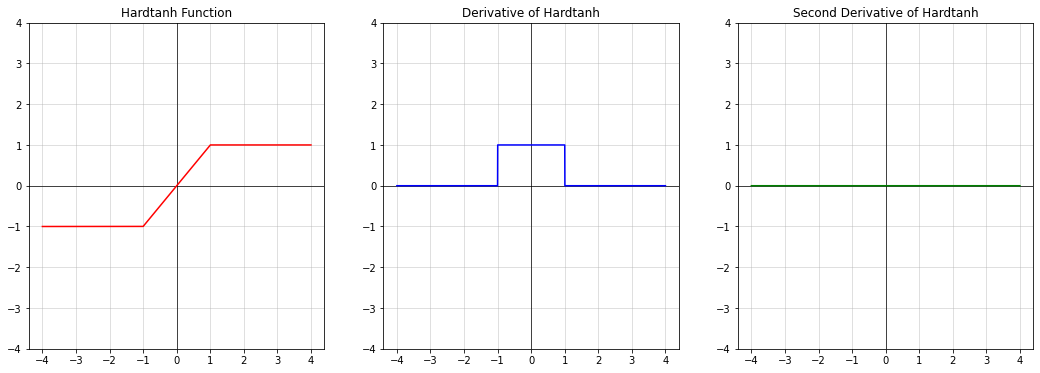

In [ ]:
@plot_activation_module()
class Hardtanh(ActivationModule):

    def forward(self, x):
        x = x.pow(1.)  # hack for second derivative
        return x.clamp(-1., 1.)


# Softsign

$$\text{SoftSign}(x) = \frac{x}{ 1 + |x|}$$

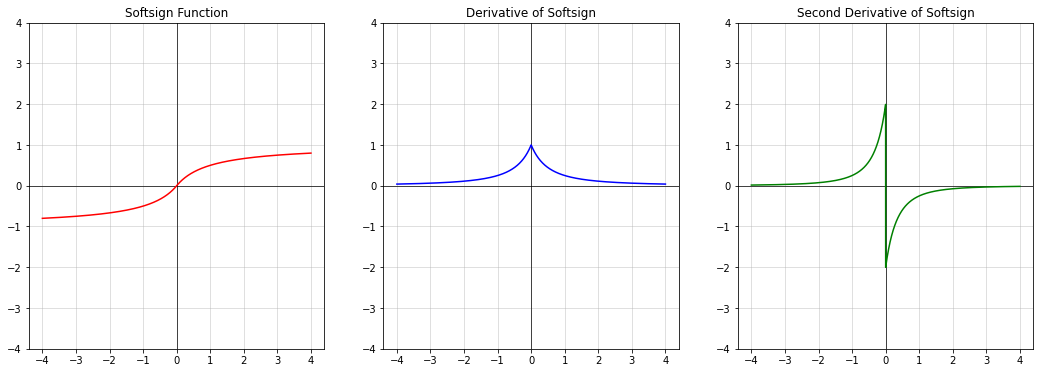

In [ ]:
@plot_activation_module()
class Softsign(ActivationModule):

    def forward(self, x):
        return x / (1 + torch.abs(x))


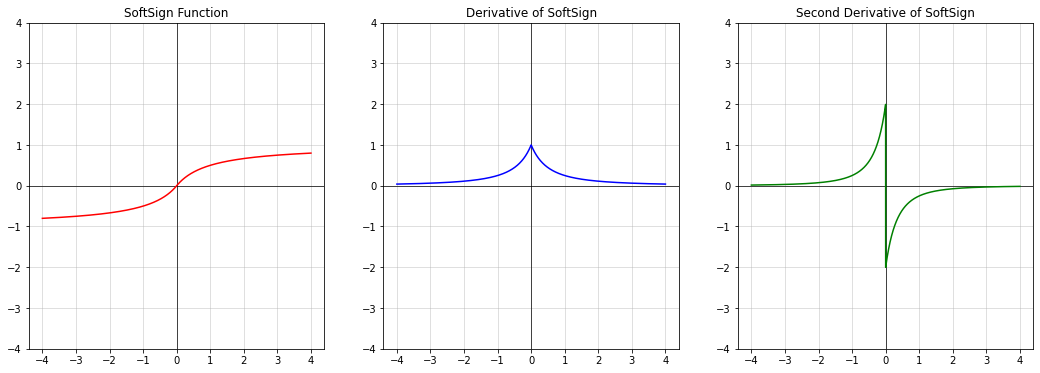

In [ ]:
@plot_activation_function
class SoftSignFunction(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input):  # noqa
        ctx.save_for_backward(input)
        return input.abs().add(1.).div(input).reciprocal()

    @staticmethod
    def backward(ctx, grad_output):  # noqa
        input, = ctx.saved_tensors
        return grad_output * input.abs().add(1.).pow(2.).reciprocal()

# ReLU

$$\text{ReLU}(x) = (x)^+ = \max(0, x)$$

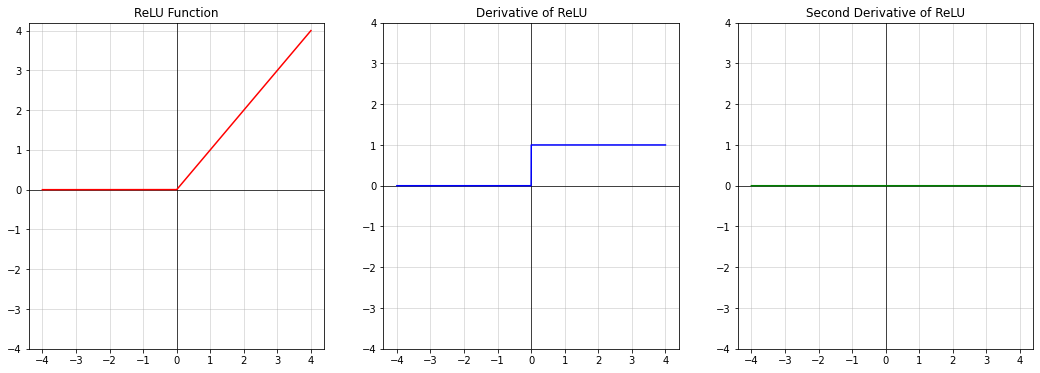

In [ ]:
@plot_activation_module()
class ReLU(ActivationModule):  # Rectified Linear Unit
    
    def forward(self, x):  # zeros_like: zero-filled tensor which has same shape with x
        x = x.pow(1.)  # hack for second derivative
        return x.clamp(0.)
    

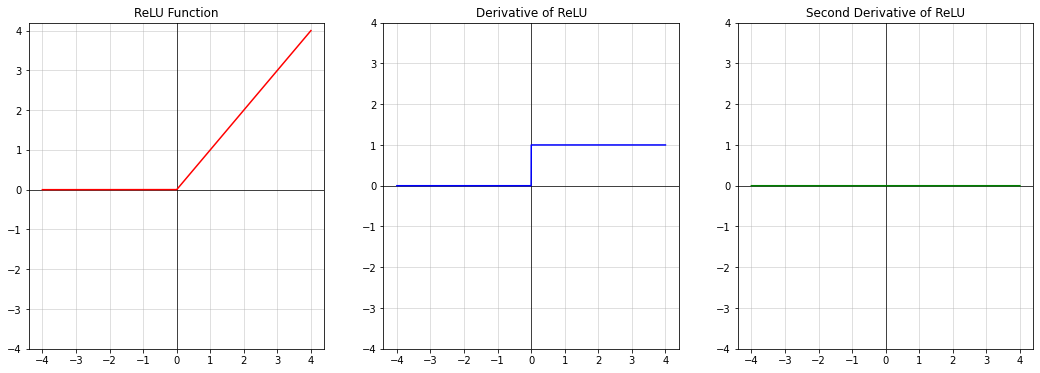

In [ ]:
@plot_activation_function
class ReLUFunction(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input):  # noqa
        ctx.save_for_backward(input)
        return input.clamp(0.)

    @staticmethod
    def backward(ctx, grad_output):  # noqa
        input, = ctx.saved_tensors
        dx = input.clone().zero_()
        dx[input >= 0.] = 1.
        return grad_output * dx

# ReLU6

$$\text{ReLU6}(x) = \min(\max(0,x), 6)$$

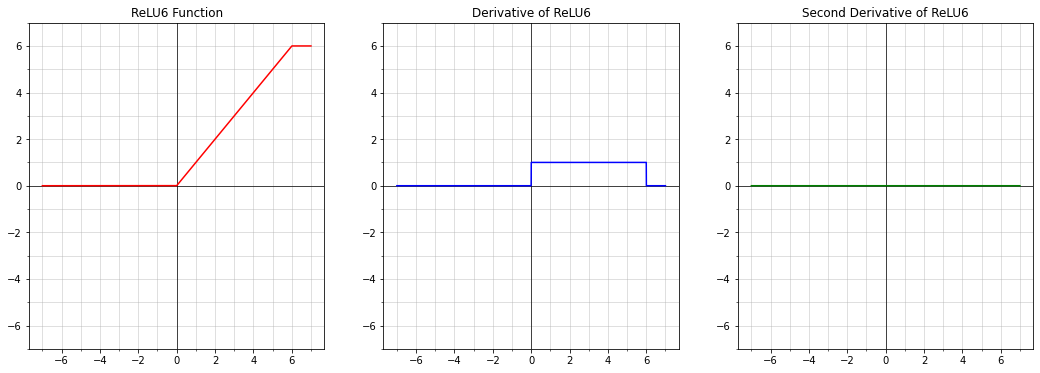

In [ ]:
@plot_activation_module(True)
class ReLU6(ActivationModule):  # Rectified Linear Unit
    
    def forward(self, x):
        x = x.pow(1.)  # hack for second derivative
        return torch.clamp(x, 0., 6.)
    

# LeakyReLU

$$\text{LeakyReLU}(x) = \max(0, x) + \text{negative_slope} * \min(0, x)$$

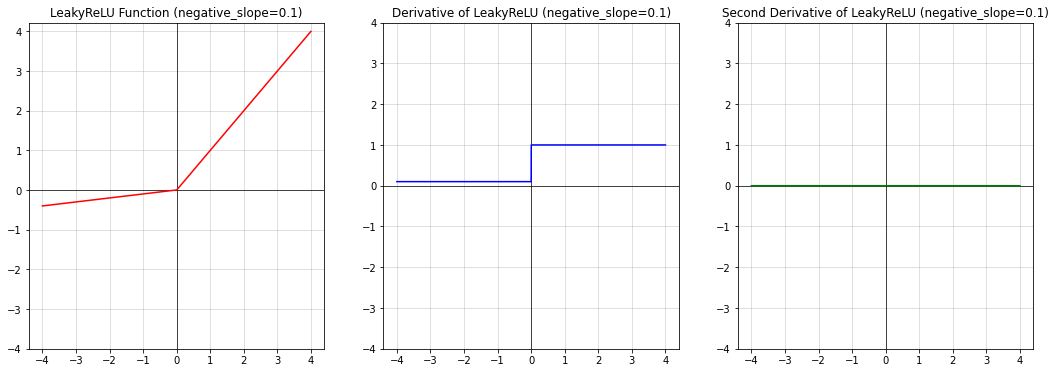

In [ ]:
@plot_activation_module(negative_slope=1e-1)
class LeakyReLU(ActivationModule):  # Leaky - Rectified Linear Unit
    
    def __init__(self, negative_slope=1e-2):
        super().__init__()
        self.negative_slope = negative_slope
    
    def forward(self, x):
        x = x.pow(1.)  # hack for second derivative
        return x.where(x >= 0., x * self.negative_slope)


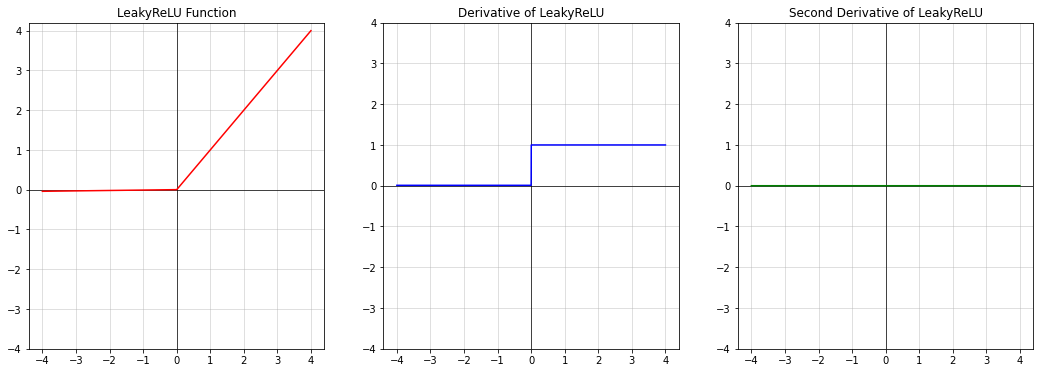

In [ ]:
@plot_activation_function
class LeakyReLUFunction(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input, negative_slope=1e-2):  # noqa
        ctx.save_for_backward(input)
        ctx.negative_slope = negative_slope
        return input.where(input >= 0., input * negative_slope)

    @staticmethod
    def backward(ctx, grad_output):  # noqa
        input, = ctx.saved_tensors
        negative_slope = ctx.negative_slope
        dx = input.clone().fill_(1.)
        dx = dx.where(input >= 0., dx * negative_slope)
        return grad_output * dx

# PReLU

$$
\text{PReLU}(x) =
    \begin{cases}
    x, & \text{ if } x \geq 0 \\
    ax, & \text{ otherwise }
    \end{cases}
$$

$$\text{Here } a \text{ is a learnable parameter.}$$

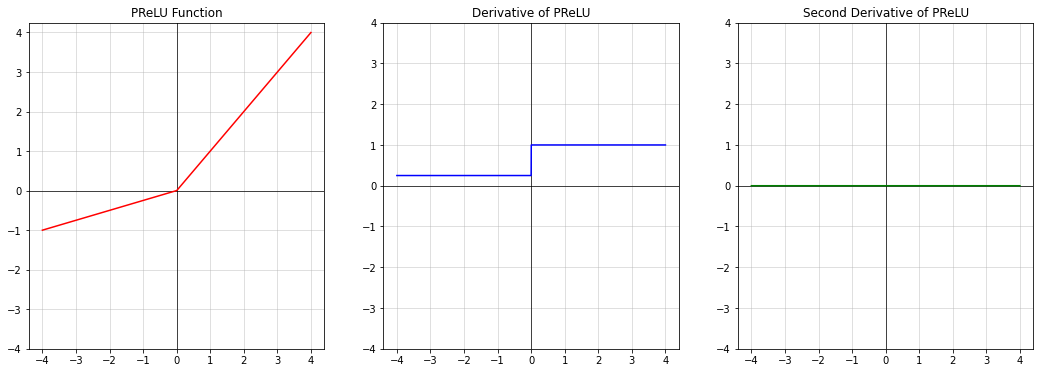

In [ ]:
@plot_activation_module()
class PReLU(ActivationModule):  # Parametric Rectified Linear Unit
    
    def __init__(self, a=.25):
        super().__init__()
        self.weight = nn.Parameter(torch.tensor(a))
    
    def forward(self, x):
        x = x.pow(1.)  # hack for second derivative
        return x.where(x >= 0., x * self.weight)
    

# Threshold

$$
y =
\begin{cases}
x, &\text{ if } x > \text{threshold} \\
\text{value}, &\text{ otherwise }
\end{cases}
$$

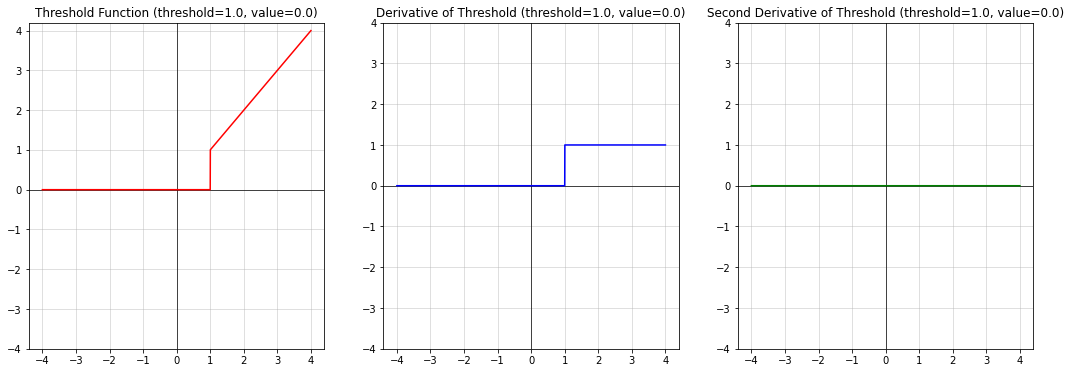

In [ ]:
@plot_activation_module(threshold=1., value=0.)  # ThresholdReLU: value=0.
class Threshold(ActivationModule):
    
    def __init__(self, threshold=1., value=0.):
        super().__init__()
        self.threshold = threshold
        self.value = value
    
    def forward(self, x):
        x = x.pow(1.)  # hack for second derivative
        return x.where(x >= self.threshold, torch.zeros_like(x).fill_(self.value))
    

# ELU

$$
\text{ELU}(x) = \begin{cases}
x, & \text{ if } x > 0\\
\alpha * (\exp(x) - 1), & \text{ if } x \leq 0
\end{cases}
$$

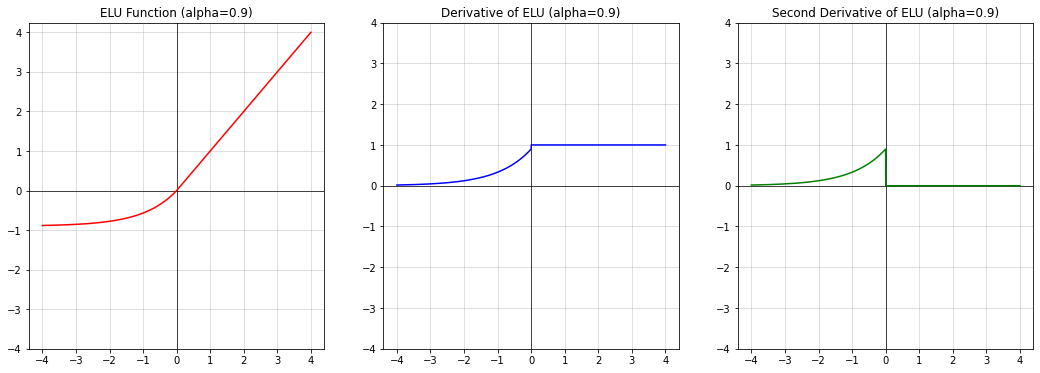

In [ ]:
@plot_activation_module(alpha=.9)
class ELU(ActivationModule):  # Exponential Linear Unit
    
    def __init__(self, alpha=1.):
        super().__init__()
        self.alpha = alpha
    
    def forward(self, x):
        return x.where(x >= 0., (x.exp() - 1.) * self.alpha)
    

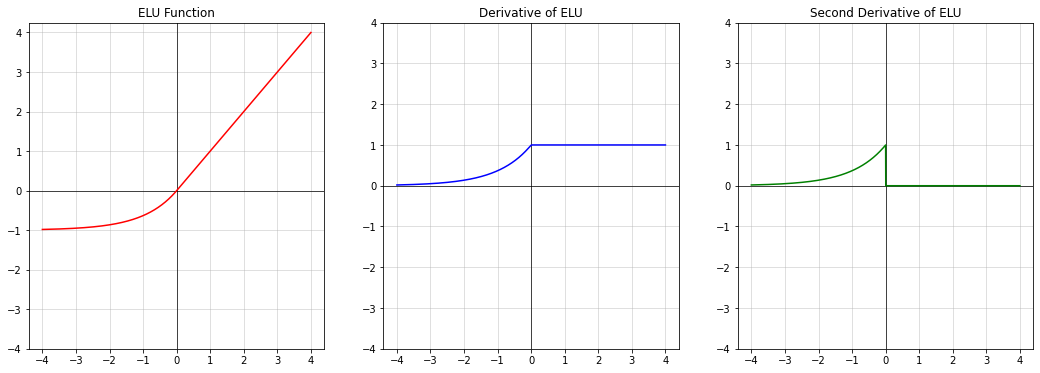

In [ ]:
@plot_activation_function
class ELUFunction(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input, alpha=1.):  # noqa
        ctx.save_for_backward(input)
        ctx.alpha = alpha
        return input.where(input >= 0., input.exp().sub(1.).mul(alpha))

    @staticmethod
    def backward(ctx, grad_output):  # noqa
        input, = ctx.saved_tensors
        alpha = ctx.alpha
        return grad_output * torch.ones_like(input).where(input >= 0., input.exp().mul(alpha))

# CELU

$$\text{CELU}(x) = \max(0,x) + \min(0, \alpha * (\exp(x/\alpha) - 1))$$

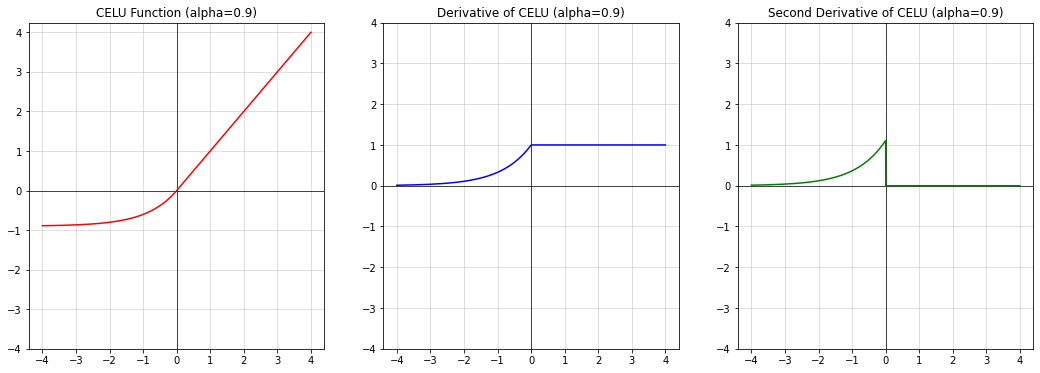

In [ ]:
@plot_activation_module(alpha=.9)
class CELU(ActivationModule):  # Continuously Differentiable ELU
    
    def __init__(self, alpha=1.):
        super().__init__()
        self.alpha = alpha
    
    def forward(self, x):
        return torch.where(x >= 0., x, (torch.exp(x / self.alpha) - 1.) * self.alpha)


# Softplus

$$\text{Softplus}(x) = \frac{1}{\beta} * \log(1 + \exp(\beta * x))$$

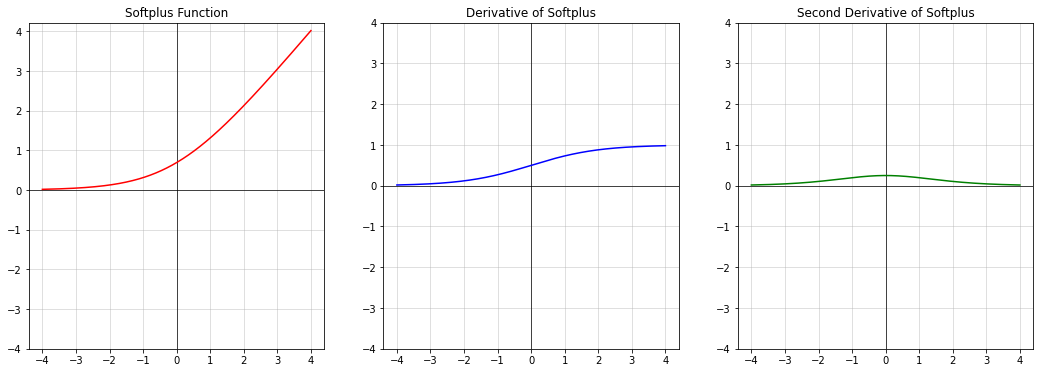

In [ ]:
@plot_activation_module()  # Derivative becomes sigmoid
class Softplus(ActivationModule):
    
    def __init__(self, beta=1.):
        super().__init__()
        self.beta = beta
    
    def forward(self, x):
        return torch.log(torch.exp(x * self.beta) + 1.)
    

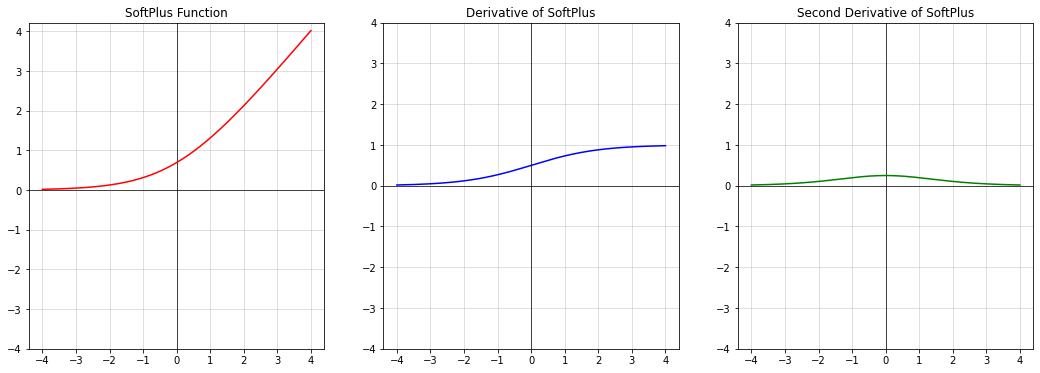

In [ ]:
@plot_activation_function
class SoftPlusFunction(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input):  # noqa
        ctx.save_for_backward(input)
        return input.exp().add_(1.).log_()

    @staticmethod
    def backward(ctx, grad_output):  # noqa
        input, = ctx.saved_tensors
        return grad_output * (1. - (1. / (1. + input.exp())))

# LogSigmoid

$$\text{LogSigmoid}(x) = \log\left(\frac{ 1 }{ 1 + \exp(-x)}\right)$$

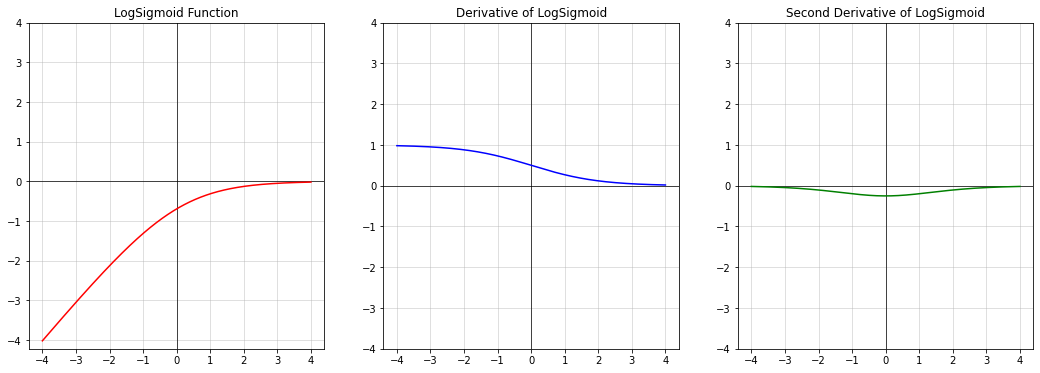

In [ ]:
@plot_activation_module()
class LogSigmoid(ActivationModule):
    
    def forward(self, x):
        return x.sigmoid().log()
    

# Swish

$$\text{Swish}(x) = \text{silu}(x) = x * \sigma(x), \text{where } \sigma(x) \text{ is the logistic sigmoid.}$$

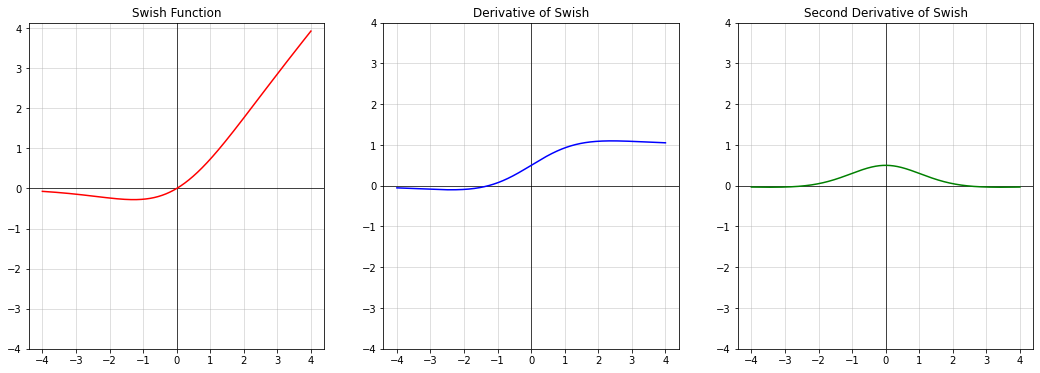

In [ ]:
@plot_activation_module()  # activation for MobileNet / EfficientNet
class Swish(ActivationModule):  # same as nn.SiLU: Sigmoid Linear Unit
    
    def __init__(self, alpha=1.):
        super().__init__()
        self.alpha = alpha
    
    def forward(self, x):
        return x * torch.sigmoid(x * self.alpha)


In [ ]:
class SwishImplementation(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input):
        result = input * torch.sigmoid(input)
        ctx.save_for_backward(input)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        sigmoid_input = torch.sigmoid(input)
        return grad_output * (sigmoid_input * (1 + input * (1 - sigmoid_input)))


# Hardswish

$$
\text{Hardswish}(x) = \begin{cases}
    0 & \text{if~} x \le -3, \\
    x & \text{if~} x \ge +3, \\
    x \cdot (x + 3) /6 & \text{otherwise}
\end{cases}
$$

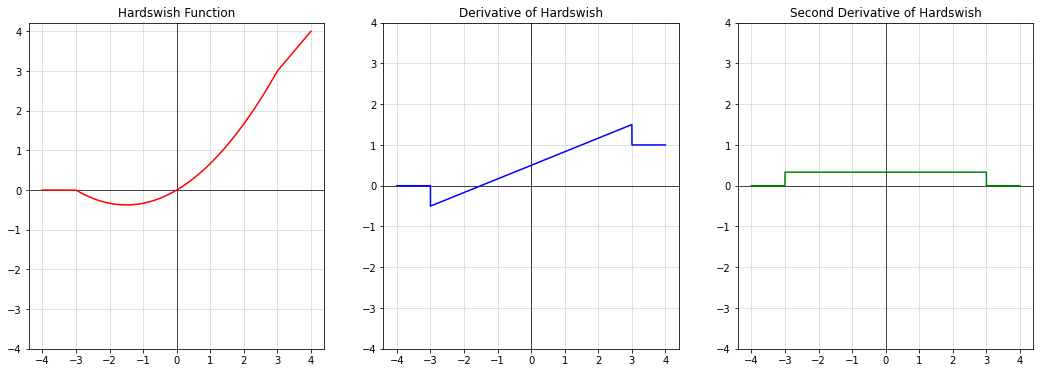

In [ ]:
@plot_activation_module()
class Hardswish(ActivationModule):  # mobilenetv3
    
    def forward(self, x):
        return torch.where(
            torch.logical_and(-3. < x, x < 3.),
            x * (x + 3.) / 6.,  # when: -3 < x < 3
            x.relu()
        )
    

# Mish

Mish is not implemented in pytorch older versions.

$$\text{Mish}(x) = x * \text{Tanh}( \text{Softplus}(x) )$$


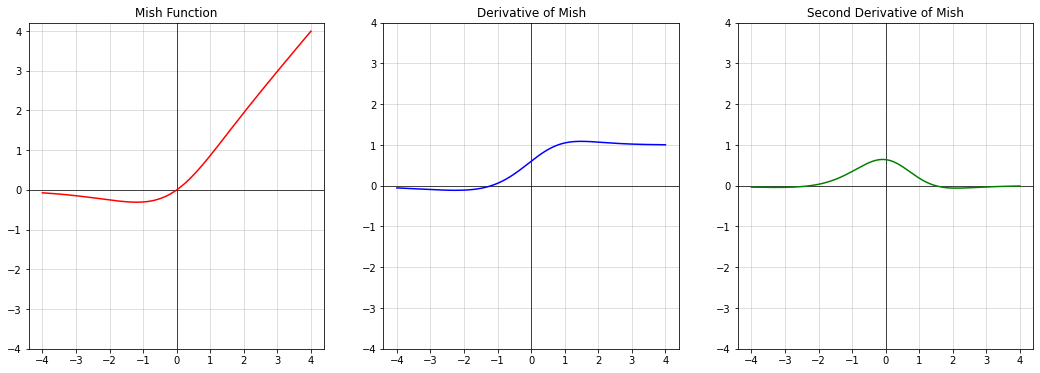

In [ ]:
@plot_activation_module()
class Mish(ActivationModule):
    
    def forward(self, x):
        softplus_x = torch.log(torch.exp(x) + 1.)
        return x * torch.tanh(softplus_x)

# see also: https://hongl.tistory.com/213

# GELU

$$
\text{GELU}(x) = x * \Phi(x)
$$

$$
\text{where } \Phi(x) \text{ is the Cumulative Distribution Function for Gaussian Distribution.}
$$

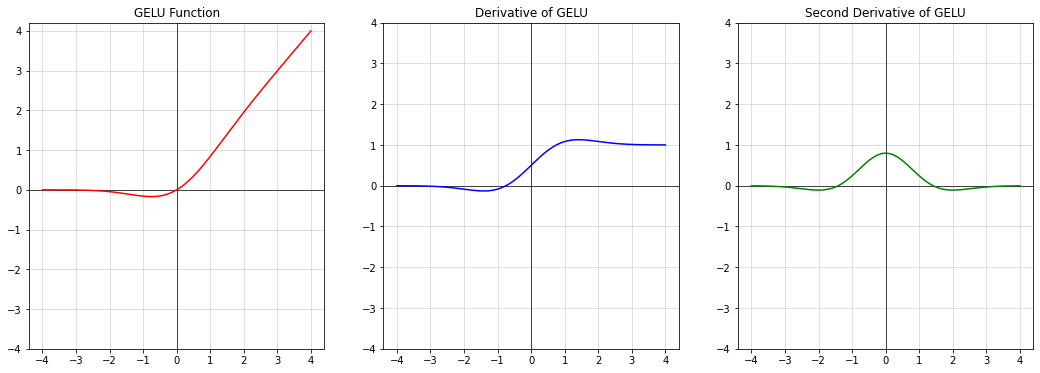

In [ ]:
@plot_activation_module()
class GELU(ActivationModule):  # Gaussian Error Linear Unit
    
    def forward(self, x):
        phi_x = (torch.erf(x / math.sqrt(2.)) + 1.) / 2.
        return x * phi_x

# see also: https://hongl.tistory.com/236

# Hardshrink

$$
\text{HardShrink}(x) =
\begin{cases}
x, & \text{ if } x > \lambda \\
x, & \text{ if } x < -\lambda \\
0, & \text{ otherwise }
\end{cases}
$$

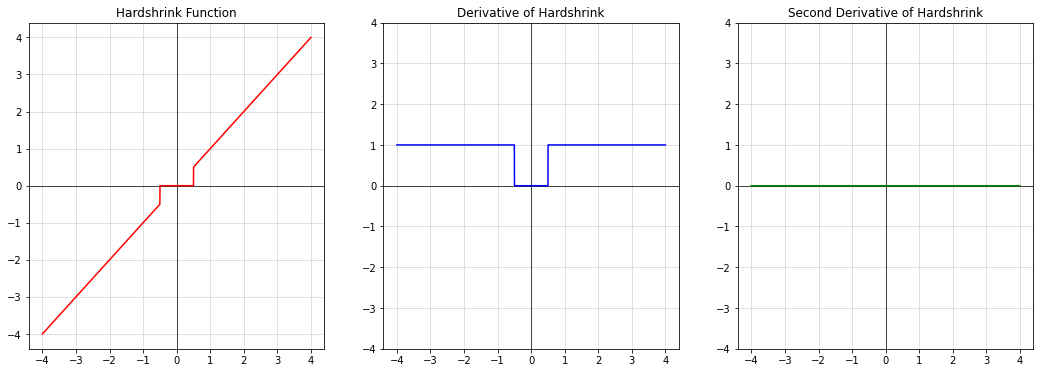

In [ ]:
@plot_activation_module()
class Hardshrink(ActivationModule):
    
    def __init__(self, lambd=.5):
        super().__init__()
        self.lambd = lambd
    
    def forward(self, x):
        x = x.pow(1.)
        return x.where(
            torch.logical_or(x > self.lambd, x < -self.lambd),
            torch.zeros_like(x)  # same as 0
        )


# Softshrink

$$
\text{SoftShrinkage}(x) =
\begin{cases}
x - \lambda, & \text{ if } x > \lambda \\
x + \lambda, & \text{ if } x < -\lambda \\
0, & \text{ otherwise }
\end{cases}
$$

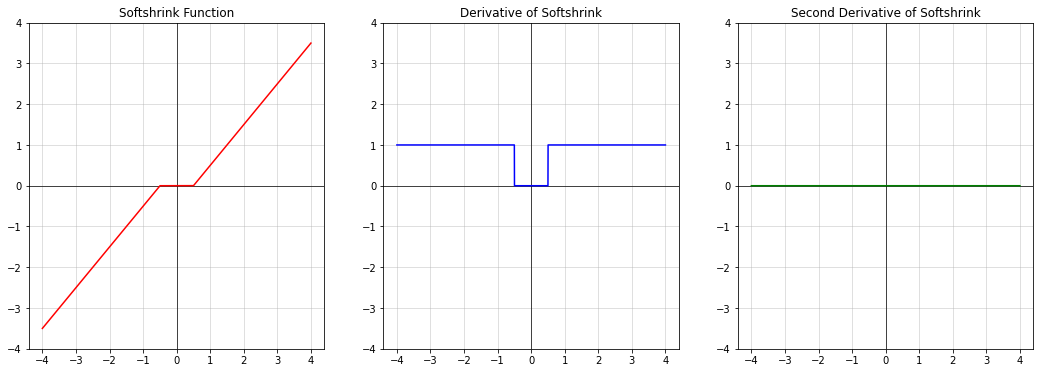

In [ ]:
@plot_activation_module()
class Softshrink(ActivationModule):
    
    def __init__(self, lambd=.5):
        super().__init__()
        self.lambd = lambd
    
    def forward(self, x):
        x = x.pow(1.)
        return torch.where(
            x > self.lambd, # 1st condition
            x - self.lambd,
            torch.where(
                x < -self.lambd,  # 2st condition
                x + self.lambd,
                torch.zeros_like(x)  # same as 0
            )
        )


# Tanhshrink

$$
\text{Tanhshrink}(x) = x - \tanh(x)
$$

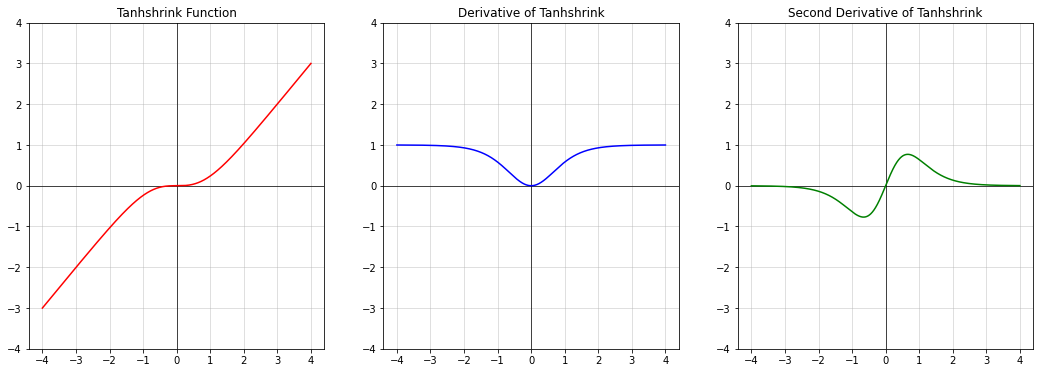

In [ ]:
@plot_activation_module()
class Tanhshrink(ActivationModule):
    
    def forward(self, x):
        return x - torch.tanh(x)


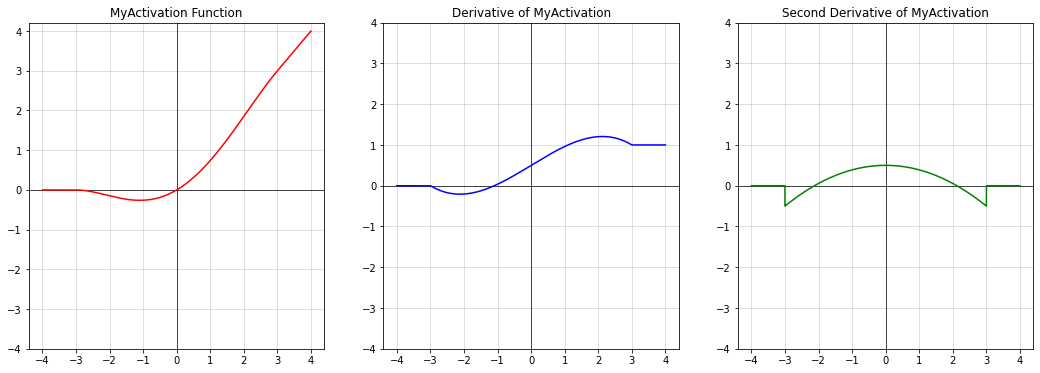

In [ ]:
@plot_activation_module()
class MyActivation(ActivationModule):  # HardSwish Alternative
    
    def forward(self, x):
        return torch.where(
            torch.logical_and(-3. < x, x < 3.),
            x * (x + 3.) * (x + 3.) * (-x + 6.) / 108.,  # when: -3 < x < 3
            x.relu()
        )
    

**All Modules are:**

In [ ]:
nn.ModuleList([klass() for klass in sorted(ActivationModule.__subclasses__(), key=lambda klass: klass.__name__)])

ModuleList(
  (0): CELU()
  (1): ELU()
  (2): GELU()
  (3): Hardshrink()
  (4): Hardsigmoid()
  (5): Hardswish()
  (6): Hardtanh()
  (7): LeakyReLU()
  (8): LogSigmoid()
  (9): Mish()
  (10): MyActivation()
  (11): PReLU()
  (12): ReLU()
  (13): ReLU6()
  (14): Sigmoid()
  (15): Softplus()
  (16): Softshrink()
  (17): Softsign()
  (18): Swish()
  (19): Tanh()
  (20): Tanhshrink()
  (21): Threshold()
)